In [3]:
import quandl
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime

from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression

In [12]:
quandl.ApiConfig.api_key = 'wmzxdZBumxkT1eLYsRWM'

df = quandl.get("WIKI/AMZN")
df = df[['Adj. Close']]
df

,Adj. Close
Date,
1997-05-16,1.729167
1997-05-19,1.708333
1997-05-20,1.635833
1997-05-21,1.427500
1997-05-22,1.395833
...,...
2018-03-21,1581.860000
2018-03-22,1544.100000
2018-03-23,1495.560000


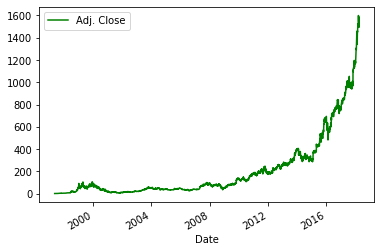

In [13]:
df['Adj. Close'].plot(color='g')
plt.legend(loc='upper left')
plt.show()

In [14]:
forecast = 30
df['Prediction'] = df[['Adj. Close']].shift(-forecast)

X = np.array(df.drop(['Prediction'], 1))
X = preprocessing.scale(X)

X_forecast = X[-forecast:]
X = X[:-forecast]

y = np.array(df['Prediction'])
y = y[:-forecast]

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

clf = LinearRegression()
clf.fit(X_train, y_train)

confidence = clf.score(X_test, y_test)

forecast_predicted = clf.predict(X_forecast)
print(forecast_predicted)

[1503.81029926 1542.74973394 1554.16301651 1540.23476224 1561.18575528
 1576.71250851 1578.67333391 1594.91408334 1618.30545146 1607.68076171
 1608.18162471 1587.93397122 1595.18049984 1620.07445698 1635.02575059
 1642.86905215 1650.17952073 1678.984472   1699.76495848 1688.88450889
 1691.88968694 1682.63970629 1671.30102033 1642.79445554 1687.10484672
 1682.14949994 1641.90995278 1590.18252642 1654.44218463 1591.77036872]


In [2]:
pip install quandl


(736445.0, 737192.5)

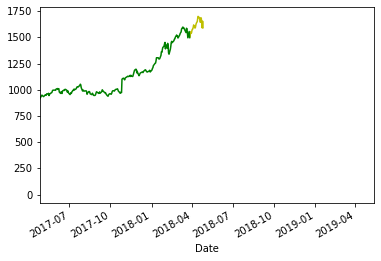

In [16]:
dates = pd.date_range(start="2018-03-28", end="2018-04-26")
plt.plot(dates, forecast_predicted, color='y')
df['Adj. Close'].plot(color='g')
plt.xlim(xmin=datetime.date(2017,4,26))